In [1]:
%load_ext autoreload

In [2]:
%autoreload 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import create_data as create

from pandas_dq import dq_report, Fix_DQ, dc_report

In [3]:
# Create training data
Data = create.CreateTrainingData()
df = Data.create_training_data()

# Create test data
X_test = create.create_test_data()

In [4]:
df.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
date_forecast,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0,0.0
2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,0.0,0.0,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.0,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0,NaN
2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,0.0,0.0,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.0,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0,NaN
2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.0,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0,NaN
2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0,0.0


In [5]:
X_test.head()

,date_calc,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
date_forecast,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-05-01 00:00:00,2023-04-30 07:00:04,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,0.0,0.0,0.0,0.0,80.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.700012,1007.000000,0.0,0.0,80.300003,1013.299988,NaN,0.0,0.0,0.0,0.0,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0
2023-05-01 00:15:00,2023-04-30 07:00:04,4.3,1.287,912.700012,0.0,0.0,1054.800049,0.0,271.700012,0.0,0.0,0.0,0.0,77.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,1000.599976,1006.900024,0.0,0.0,80.300003,1013.200012,NaN,0.0,0.0,0.0,0.0,14.203000,-10.825,0.0,273.799988,77.000000,30003.599609,4.0,2.1,3.4,-0.0
2023-05-01 00:30:00,2023-04-30 07:00:04,4.3,1.287,912.700012,0.0,0.0,1068.300049,0.0,271.600006,0.0,0.0,0.0,0.0,73.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,1000.500000,1006.700012,0.0,0.0,80.300003,1013.000000,NaN,0.0,0.0,0.0,0.0,17.868999,-10.360,0.0,273.799988,73.099998,29797.099609,3.9,2.1,3.3,-0.0
2023-05-01 00:45:00,2023-04-30 07:00:04,4.3,1.287,912.700012,0.0,0.0,1081.900024,0.0,271.600006,0.0,0.0,0.0,0.0,69.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.500000,0.0,0.0,1000.400024,1006.599976,0.0,0.0,80.199997,1012.900024,NaN,0.0,0.0,0.0,0.0,21.514000,-9.794,0.0,273.799988,69.000000,29618.599609,3.9,2.0,3.3,-0.0
2023-05-01 01:00:00,2023-04-30 07:00:04,4.3,1.287,NaN,0.0,0.0,1095.400024,0.0,271.600006,0.0,0.0,0.0,0.0,64.500000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.299988,0.0,0.0,1000.200012,1006.500000,0.0,0.0,80.199997,1012.799988,NaN,0.0,0.0,0.0,0.0,25.135000,-9.128,0.0,273.799988,64.500000,29507.500000,3.9,2.0,3.3,-0.0


#### The dtaframe contains all data for each builiding, we now that the distinguisihing feature is elevation so we're using that to create a building featyre for easy data management

In [6]:
# add a new feature to the training data that is named building: It is either 0, 1, 2 depending on the elevation of the building where 0 is 6, 1 is 7 and 2 is 24
df['building'] = df['elevation:m'].apply(lambda x: 0 if x == 6 else (1 if x == 7 else 2))
# add a new feature to the test data that is named building: It is either 0, 1, 2 depending on the elevation of the building where 0 is 6, 1 is 7 and 2 is 24
X_test['building'] = X_test['elevation:m'].apply(lambda x: 0 if x == 6 else (1 if x == 7 else 2))

In [7]:
df

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement,building
date_forecast,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202,0.0,285.899994,100.000000,39640.101562,3.7,-3.6,-0.8,-0.0,0.0,0
2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,0.0,0.0,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.0,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650,0.0,286.100006,100.000000,40123.898438,3.6,-3.6,-0.6,-0.0,NaN,0
2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,0.0,0.0,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.0,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998,0.0,286.299988,100.000000,40628.300781,3.6,-3.6,-0.4,-0.0,NaN,0
2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.0,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247,0.0,286.600006,100.000000,41153.601562,3.5,-3.5,-0.2,-0.0,NaN,0
2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393,0.0,286.799988,100.000000,41699.898438,3.5,-3.5,0.0,-0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 22:45:00,4.4,1.280,1034.599976,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.800003,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.599976,1004.900024,0.0,0.0,80.000000,1011.099976,NaN,0.0,0.0,-0.0,0.1,352.915985,-11.769,0.2,274.200012,99.900002,10681.200195,3.0,2.1,2.2,-0.0,NaN,2
2023-04-30 23:00:00,4.4,1.280,897.200012,0.0,0.0,569.500000,0.0,272.000000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.500000,1004.799988,0.0,0.0,80.400002,1011.099976,NaN,0.0,0.0,-0.0,0.1,356.630005,-11.923,0.2,274.100006,100.000000,9890.900391,2.8,1.9,2.1,-0.0,-0.0,2
2023-04-30 23:15:00,4.4,1.280,1288.699951,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.699997,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.200012,0.0,0.0,998.400024,1004.700012,0.0,0.0,80.099998,1010.900024,NaN,0.0,0.0,-0.0,0.1,0.349000,-11.967,0.1,274.200012,100.000000,10716.799805,2.9,1.9,2.2,-0.0,NaN,2


In [8]:
X_test

,date_calc,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,building
date_forecast,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-05-01 00:00:00,2023-04-30 07:00:04,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,0.0,0.0,0.0,0.0,80.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.700012,1007.000000,0.0,0.0,80.300003,1013.299988,NaN,0.0,0.0,0.0,0.0,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0,0
2023-05-01 00:15:00,2023-04-30 07:00:04,4.3,1.287,912.700012,0.0,0.0,1054.800049,0.0,271.700012,0.0,0.0,0.0,0.0,77.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,1000.599976,1006.900024,0.0,0.0,80.300003,1013.200012,NaN,0.0,0.0,0.0,0.0,14.203000,-10.825,0.0,273.799988,77.000000,30003.599609,4.0,2.1,3.4,-0.0,0
2023-05-01 00:30:00,2023-04-30 07:00:04,4.3,1.287,912.700012,0.0,0.0,1068.300049,0.0,271.600006,0.0,0.0,0.0,0.0,73.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,1000.500000,1006.700012,0.0,0.0,80.300003,1013.000000,NaN,0.0,0.0,0.0,0.0,17.868999,-10.360,0.0,273.799988,73.099998,29797.099609,3.9,2.1,3.3,-0.0,0
2023-05-01 00:45:00,2023-04-30 07:00:04,4.3,1.287,912.700012,0.0,0.0,1081.900024,0.0,271.600006,0.0,0.0,0.0,0.0,69.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.500000,0.0,0.0,1000.400024,1006.599976,0.0,0.0,80.199997,1012.900024,NaN,0.0,0.0,0.0,0.0,21.514000,-9.794,0.0,273.799988,69.000000,29618.599609,3.9,2.0,3.3,-0.0,0
2023-05-01 01:00:00,2023-04-30 07:00:04,4.3,1.287,NaN,0.0,0.0,1095.400024,0.0,271.600006,0.0,0.0,0.0,0.0,64.500000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.299988,0.0,0.0,1000.200012,1006.500000,0.0,0.0,80.199997,1012.799988,NaN,0.0,0.0,0.0,0.0,25.135000,-9.128,0.0,273.799988,64.500000,29507.500000,3.9,2.0,3.3,-0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 22:45:00,2023-07-02 07:00:31,9.0,1.207,2003.500000,0.0,0.0,1573.000000,0.0,282.600006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,978.799988,984.700012,0.0,0.0,84.000000,990.599976,NaN,0.0,0.0,-0.0,0.0,351.852997,-3.320,0.1,285.299988,100.000000,39008.300781,1.8,1.6,-0.7,0.0,2
2023-07-03 23:00:00,2023-07-02 07:00:31,9.0,1.207,2005.599976,0.0,0.0,1471.000000,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.799988,984.700012,0.0,0.0,84.099998,990.700012,NaN,0.0,0.0,-0.0,0.0,355.315002,-3.508,0.1,285.200012,100.000000,39026.000000,1.7,1.6,-0.7,0.0,2
2023-07-03 23:15:00,2023-07-02 07:00:31,9.0,1.207,2005.500000,0.0,0.0,1346.900024,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.900024,984.799988,0.0,0.0,84.400002,990.700012,NaN,0.0,0.0,-0.0,0.0,358.782013,-3.594,0.1,285.100006,100.000000,39081.300781,1.7,1.6,-0.6,0.0,2


# Analyse dataset

In [9]:
dqr = dq_report(df, target='pv_measurement', csv_engine='pandas', html=False, verbose=1)

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
absolute_humidity_2m:gm3,float32,0.000000,0,0.500000,18.900000,No issue
air_density_2m:kgm3,float32,0.000000,0,1.139000,1.441000,No issue
ceiling_height_agl:m,float32,18.054009,19,nan,nan,"73146 missing values. Impute them with mean, median, mode, or a constant value such as 123."
clear_sky_energy_1h:J,float32,0.000000,51,0.000000,3007721.500000,No issue
clear_sky_rad:W,float32,0.000000,2,0.000000,837.000000,No issue
cloud_base_agl:m,float32,7.629748,14,nan,nan,"30912 missing values. Impute them with mean, median, mode, or a constant value such as 123."
dew_or_rime:idx,float32,0.000000,0,-1.000000,1.000000,No issue
dew_point_2m:K,float32,0.000000,0,247.300003,295.100006,No issue
diffuse_rad:W,float32,0.000000,0,0.000000,345.700012,No issue
diffuse_rad_1h:J,float32,0.000000,51,0.000000,1217465.375000,No issue


small summary:

In [10]:
_ = dq_report(df, target='pv_measurement', verbose=0)

This is a summary report. Change verbose to 1 to see more details on each DQ issue.


,DQ Issue
The Good News,"There are no duplicate rows in this dataset, There are no duplicate columns in this datatset, There are no ID columns in the dataset. So no ID columns to remove before modeling., There are no categorical columns with rare categories (< 1 percent) in this dataset, There are no columns with infinite values in this dataset , There are no columns with mixed (more than one) dataypes in this dataset, There are no high cardinality columns in this dataset, There are no highly correlated columns in the dataset., There are no target leakage columns in the dataset"
The Bad News,"There are zero-variance columns in the dataset. Recommend removing them before modeling., There are 2 numerical columns, some with outliers. Remove them or use robust statistics."


# Check test data

In [11]:
_ = dq_report(X_test, verbose=1)

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
date_calc,datetime64[ns],0.000000,0,nan,nan,No issue
absolute_humidity_2m:gm3,float32,0.000000,1,3.200000,14.200000,No issue
air_density_2m:kgm3,float32,0.000000,1,1.142000,1.301000,No issue
ceiling_height_agl:m,float32,27.743056,57,nan,nan,"2397 missing values. Impute them with mean, median, mode, or a constant value such as 123."
clear_sky_energy_1h:J,float32,0.000000,83,0.000000,3007376.250000,No issue
clear_sky_rad:W,float32,0.000000,38,0.000000,836.900024,No issue
cloud_base_agl:m,float32,10.995370,72,nan,nan,"950 missing values. Impute them with mean, median, mode, or a constant value such as 123."
dew_or_rime:idx,float32,0.000000,0,-1.000000,1.000000,No issue
dew_point_2m:K,float32,0.000000,2,268.000000,290.200012,No issue
diffuse_rad:W,float32,0.000000,26,0.000000,321.899994,No issue


In [12]:
_ = dq_report(X_test, verbose=0)

This is a summary report. Change verbose to 1 to see more details on each DQ issue.


,DQ Issue
The Good News,"There are no duplicate rows in this dataset, There are no duplicate columns in this datatset, There are no ID columns in the dataset. So no ID columns to remove before modeling., There are no categorical columns with rare categories (< 1 percent) in this dataset, There are no columns with infinite values in this dataset , There are no columns with mixed (more than one) dataypes in this dataset, There are no numeric columns with outliers in this dataset, There are no high cardinality columns in this dataset, There are no highly correlated columns in the dataset., There is no target given. Hence no target leakage columns detected in the dataset"
The Bad News,There are zero-variance columns in the dataset. Recommend removing them before modeling.


## Remove some features based on the reports

In [13]:
drop_features = ['snow_density:kgm3']
# drop the features in drop_features list
df = df.drop(drop_features, axis=1)
X_test = X_test.drop(drop_features, axis=1)

See that snow_depth:cm, snow_drift:idx and snow_melt_10min:mm has zero variance and therefore are of little interest

In [14]:
# drop snow_depth:cm, snow_drift:idx and snow_melt_10min:mm
df = df.drop(columns=['snow_depth:cm', 'snow_drift:idx', 'snow_melt_10min:mm'])
X_test = X_test.drop(columns=['snow_depth:cm', 'snow_drift:idx', 'snow_melt_10min:mm'])

In [15]:
_ = dq_report(df, verbose=1)

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
absolute_humidity_2m:gm3,float32,0.000000,0,0.500000,18.900000,No issue
air_density_2m:kgm3,float32,0.000000,0,1.139000,1.441000,No issue
ceiling_height_agl:m,float32,18.054009,19,nan,nan,"73146 missing values. Impute them with mean, median, mode, or a constant value such as 123."
clear_sky_energy_1h:J,float32,0.000000,51,0.000000,3007721.500000,No issue
clear_sky_rad:W,float32,0.000000,2,0.000000,837.000000,No issue
cloud_base_agl:m,float32,7.629748,14,nan,nan,"30912 missing values. Impute them with mean, median, mode, or a constant value such as 123."
dew_or_rime:idx,float32,0.000000,0,-1.000000,1.000000,No issue
dew_point_2m:K,float32,0.000000,0,247.300003,295.100006,No issue
diffuse_rad:W,float32,0.000000,0,0.000000,345.700012,No issue
diffuse_rad_1h:J,float32,0.000000,51,0.000000,1217465.375000,No issue


In [16]:
_ = dq_report(X_test, verbose=1)

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
date_calc,datetime64[ns],0.000000,0,nan,nan,No issue
absolute_humidity_2m:gm3,float32,0.000000,1,3.200000,14.200000,No issue
air_density_2m:kgm3,float32,0.000000,1,1.142000,1.301000,No issue
ceiling_height_agl:m,float32,27.743056,57,nan,nan,"2397 missing values. Impute them with mean, median, mode, or a constant value such as 123."
clear_sky_energy_1h:J,float32,0.000000,83,0.000000,3007376.250000,No issue
clear_sky_rad:W,float32,0.000000,38,0.000000,836.900024,No issue
cloud_base_agl:m,float32,10.995370,72,nan,nan,"950 missing values. Impute them with mean, median, mode, or a constant value such as 123."
dew_or_rime:idx,float32,0.000000,0,-1.000000,1.000000,No issue
dew_point_2m:K,float32,0.000000,2,268.000000,290.200012,No issue
diffuse_rad:W,float32,0.000000,26,0.000000,321.899994,No issue


Still missing some data in cloud ceiling and cloud base

IMPORTANT NOTE from metematics: -666 indicates no clouds present

In [17]:
# check how often the value -666 occurs in the columns cloud_base_agl:m and ceiling_height_agl:m in X_train and X_test print them using a print statement
print(df[df['cloud_base_agl:m'] == -666].shape)
print(X_test[X_test['cloud_base_agl:m'] == -666].shape)

print(df[df['ceiling_height_agl:m'] == -666].shape)
print(X_test[X_test['ceiling_height_agl:m'] == -666].shape)

(0, 43)
(0, 43)
(0, 43)
(0, 43)


Seems like there are few days were this occurs

In [18]:
# check for missing values in the dataframe
df.isnull().sum()


absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               73146
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                   30912
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min:idx                   0
pressure_100m:hP

In [19]:
X_test.isnull().sum()

date_calc                            0
absolute_humidity_2m:gm3             0
air_density_2m:kgm3                  0
ceiling_height_agl:m              2397
clear_sky_energy_1h:J                0
clear_sky_rad:W                      0
cloud_base_agl:m                   950
dew_or_rime:idx                      0
dew_point_2m:K                       0
diffuse_rad:W                        0
diffuse_rad_1h:J                     0
direct_rad:W                         0
direct_rad_1h:J                      0
effective_cloud_cover:p              0
elevation:m                          0
fresh_snow_12h:cm                    0
fresh_snow_1h:cm                     0
fresh_snow_24h:cm                    0
fresh_snow_3h:cm                     0
fresh_snow_6h:cm                     0
is_day:idx                           0
is_in_shadow:idx                     0
msl_pressure:hPa                     0
precip_5min:mm                       0
precip_type_5min:idx                 0
pressure_100m:hPa        

In [20]:
df.columns

Index(['absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_water:kgm2', 'sun_azimuth:d', 'sun_elevation:d',
       'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p',
       'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms',
       'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms', 'pv_measurement',
       'building'],
      dtype='

Seemes like it's just ceiling_height_agl:m and cloud_base_agl:m that misses data

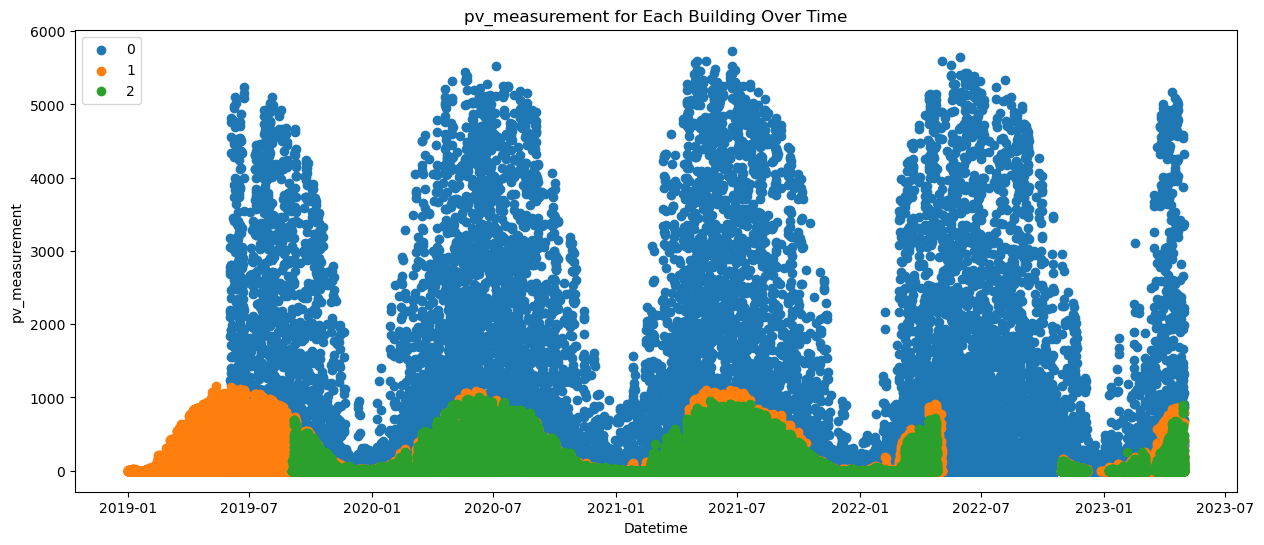

In [21]:
plt.figure(figsize=(15, 6))

for building, data in df.groupby('building'):
    plt.scatter(data.index, data['pv_measurement'], label=building, marker='o')

plt.xlabel('Datetime')
plt.ylabel('pv_measurement')
plt.title('pv_measurement for Each Building Over Time')
plt.legend()
plt.show()

### Building B and C (1 and 2) seem to have a very similar distriubution while building A produces much more power.

Want to split them into two datasets and two subsequent models

In [22]:
# Make two new dataframes and X_tests named df_A, df_BC and X_test_A, X_test_BC
df_A = df[df['building'] == 0]
df_BC = df[df['building'] != 0]
X_test_A = X_test[X_test['building'] == 0]
X_test_BC = X_test[X_test['building'] != 0]

In [23]:
# save the dataframe as a csv file
df.to_csv('training_data/processed/df.csv', index=True)
df_A.to_csv('training_data/processed/df_A.csv', index=True)
df_BC.to_csv('training_data/processed/df_BC.csv', index=True)

In [ ]:
# save X_test to a csv file
X_test.to_csv('training_data/processed/X_test.csv', index=True)
X_test_A.to_csv('training_data/processed/X_test_A.csv', index=True)
X_test_BC.to_csv('training_data/processed/X_test_BC.csv', index=True)

In [ ]:
# save the pv_measurement column and building to a csv file
df[['pv_measurement', 'building']].to_csv('training_data/processed/y_train.csv', index=True)
df_A[['pv_measurement', 'building']].to_csv('training_data/processed/y_train_A.csv', index=True)
df_BC[['pv_measurement', 'building']].to_csv('training_data/processed/y_train_BC.csv', index=True)